<a href="https://colab.research.google.com/github/pserpaschiavo/svc-degradation-detection/blob/main/Correntropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel


In [39]:
def generalized_correlation(signal1, signal2, sigma=1.0):
    """
    Calcula a Generalized Correlation Function entre duas séries temporais.

    :param signal1: Série temporal 1 (array ou lista).
    :param signal2: Série temporal 2 (array ou lista).
    :param sigma: Parâmetro da largura do kernel Gaussiano.
    :return: Valor da GCF.
    """
    signal1 = np.asarray(signal1).reshape(-1, 1)
    signal2 = np.asarray(signal2).reshape(-1, 1)

    # Calcula o kernel
    kernel_matrix = rbf_kernel(signal1, signal2, gamma=1.0 / (2 * sigma**2))

    # Retorna a média do kernel (aproximação da integral conjunta)
    return np.mean(kernel_matrix)


In [40]:
# Sinais de exemplo
np.random.seed(42)
time = np.linspace(0, 10, 1000)
signal1 = np.sin(time) + 0.1 * np.random.normal(size=time.shape)
signal2 = np.sin(time + 0.5) + 0.1 * np.random.normal(size=time.shape)


In [31]:
print(f"Signal1 - Média: {np.mean(signal1):.4f}, Desvio Padrão: {np.std(signal1):.4f}")
print(f"Signal2 - Média: {np.mean(signal2):.4f}, Desvio Padrão: {np.std(signal2):.4f}")


Signal1 - Média: 0.1854, Desvio Padrão: 0.6771
Signal2 - Média: 0.1421, Desvio Padrão: 0.7008


In [32]:
signal1_normalized = (signal1 - np.mean(signal1)) / np.std(signal1)
signal2_normalized = (signal2 - np.mean(signal2)) / np.std(signal2)

print(f"Signal1 Normalizado - Média: {np.mean(signal1_normalized):.4f}, Desvio Padrão: {np.std(signal1_normalized):.4f}")
print(f"Signal2 Normalizado - Média: {np.mean(signal2_normalized):.4f}, Desvio Padrão: {np.std(signal2_normalized):.4f}")


Signal1 Normalizado - Média: -0.0000, Desvio Padrão: 1.0000
Signal2 Normalizado - Média: 0.0000, Desvio Padrão: 1.0000


In [26]:
# Calculando a GCF
sigma_value = 0.5
gcf_value = generalized_correlation(signal1, signal2, sigma=sigma_value)


In [33]:
# Calculando a GCF
sigma_value = 0.5
gcf_value_normalized = generalized_correlation(signal1_normalized, signal2_normalized, sigma=sigma_value)


In [27]:
# Resultado
print(f"Correntropia entre os sinais (sigma={sigma_value}): {gcf_value}")

Correntropia entre os sinais (sigma=0.5): 0.44823418652952846


In [34]:
# Resultado
print(f"Correntropia entre os sinais (sigma={sigma_value}): {gcf_value_normalized}")

Correntropia entre os sinais (sigma=0.5): 0.3386537669213071


In [28]:
for sigma in [0.1, 0.5, 1.0, 2.0]:
    gcf_value = generalized_correlation(signal1, signal2, sigma=sigma)
    print(f"Correntropia entre os sinais (sigma={sigma}): {gcf_value}")

Correntropia entre os sinais (sigma=0.1): 0.11737458331622434
Correntropia entre os sinais (sigma=0.5): 0.44823418652952846
Correntropia entre os sinais (sigma=1.0): 0.701399969855495
Correntropia entre os sinais (sigma=2.0): 0.8959214273278385


In [35]:
for sigma in [0.1, 0.5, 1.0, 2.0]:
    gcf_value_normalized = generalized_correlation(signal1_normalized, signal2_normalized, sigma=sigma)
    print(f"Correntropia entre os sinais (sigma={sigma}): {gcf_value_normalized}")

Correntropia entre os sinais (sigma=0.1): 0.0812997759521922
Correntropia entre os sinais (sigma=0.5): 0.3386537669213071
Correntropia entre os sinais (sigma=1.0): 0.5612091593469184
Correntropia entre os sinais (sigma=2.0): 0.8085951004992731


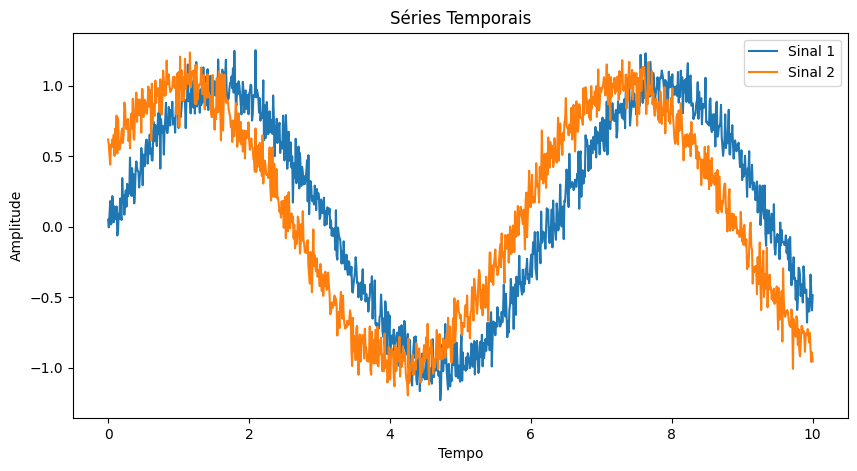

In [29]:
# Visualizando as séries
plt.figure(figsize=(10, 5))
plt.plot(time, signal1, label='Sinal 1')
plt.plot(time, signal2, label='Sinal 2')
plt.legend()
plt.title("Séries Temporais")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show()

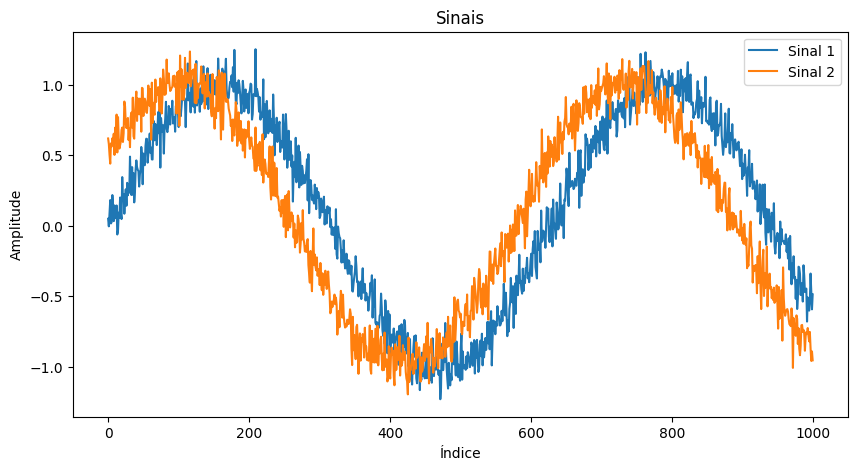

In [41]:
# Plotando os sinais
plt.figure(figsize=(10, 5))
plt.plot(signal1, label="Sinal 1")
plt.plot(signal2, label="Sinal 2")
plt.legend()
plt.title("Sinais")
plt.xlabel("Índice")
plt.ylabel("Amplitude")
plt.show()

Correntropia entre os sinais (sigma=0.1): 0.11737458331622434


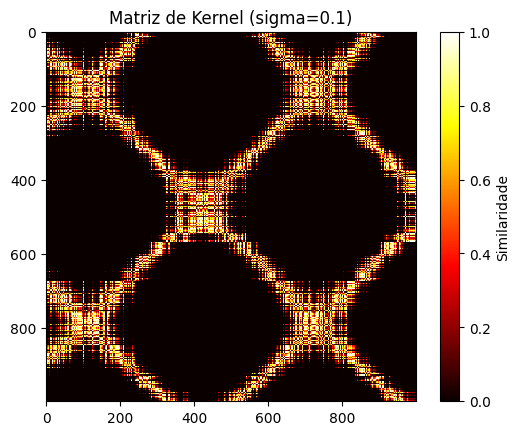

Correntropia entre os sinais (sigma=0.5): 0.44823418652952846


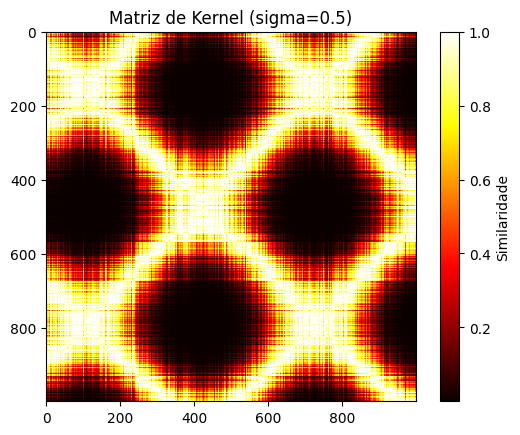

Correntropia entre os sinais (sigma=1.0): 0.701399969855495


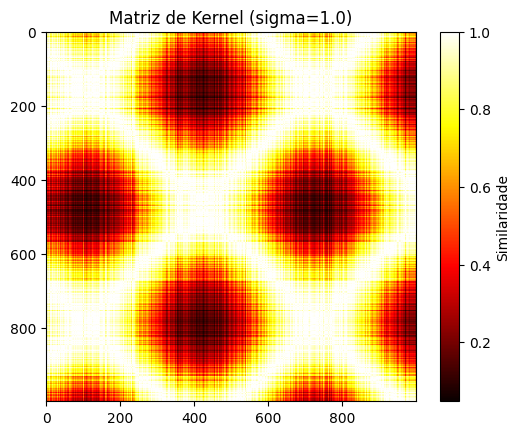

Correntropia entre os sinais (sigma=2.0): 0.8959214273278385


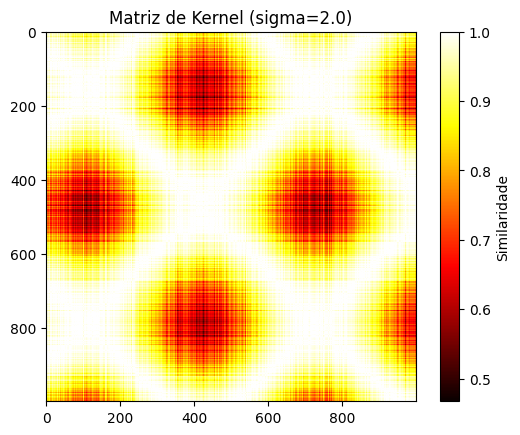

In [43]:
for sigma in [0.1, 0.5, 1.0, 2.0]:
    gcf_value = generalized_correlation(signal1, signal2, sigma=sigma)
    print(f"Correntropia entre os sinais (sigma={sigma}): {gcf_value}")
# Plotando a matriz de kernel
    kernel_matrix = rbf_kernel(signal1.reshape(-1, 1), signal2.reshape(-1, 1), gamma=1.0 / (2 * sigma**2))
    plt.imshow(kernel_matrix, cmap='hot', interpolation='nearest')
    plt.title(f"Matriz de Kernel (sigma={sigma})")
    plt.colorbar(label="Similaridade")
    plt.show()

Correntropia entre os sinais (sigma=0.1): 0.0812997759521922


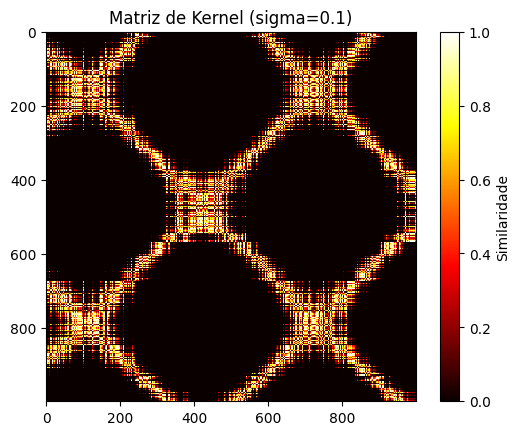

Correntropia entre os sinais (sigma=0.5): 0.3386537669213071


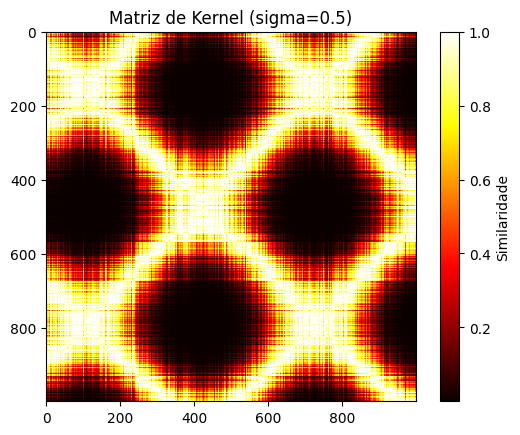

Correntropia entre os sinais (sigma=1.0): 0.5612091593469184


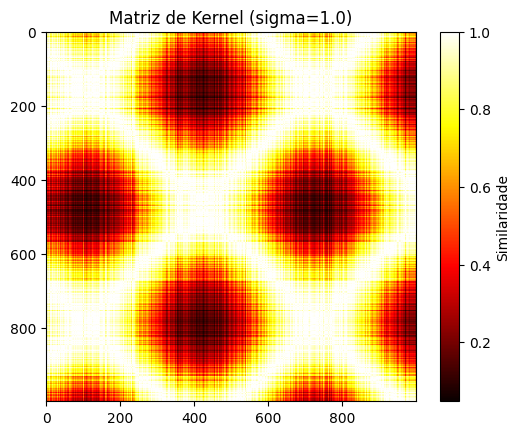

Correntropia entre os sinais (sigma=2.0): 0.8085951004992731


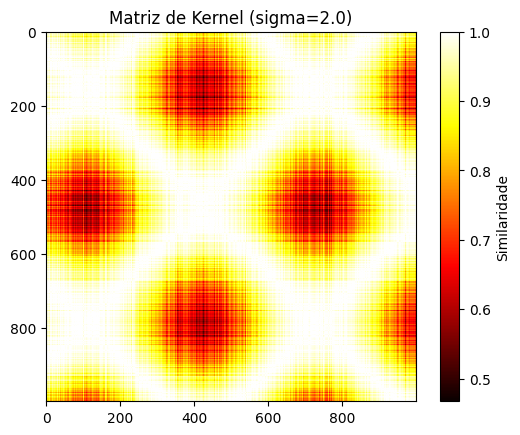

In [44]:
for sigma in [0.1, 0.5, 1.0, 2.0]:
    gcf_value_normalized = generalized_correlation(signal1_normalized, signal2_normalized, sigma=sigma)
    print(f"Correntropia entre os sinais (sigma={sigma}): {gcf_value_normalized}")
# Plotando a matriz de kernel
    kernel_matrix = rbf_kernel(signal1.reshape(-1, 1), signal2.reshape(-1, 1), gamma=1.0 / (2 * sigma**2))
    plt.imshow(kernel_matrix, cmap='hot', interpolation='nearest')
    plt.title(f"Matriz de Kernel (sigma={sigma})")
    plt.colorbar(label="Similaridade")
    plt.show()

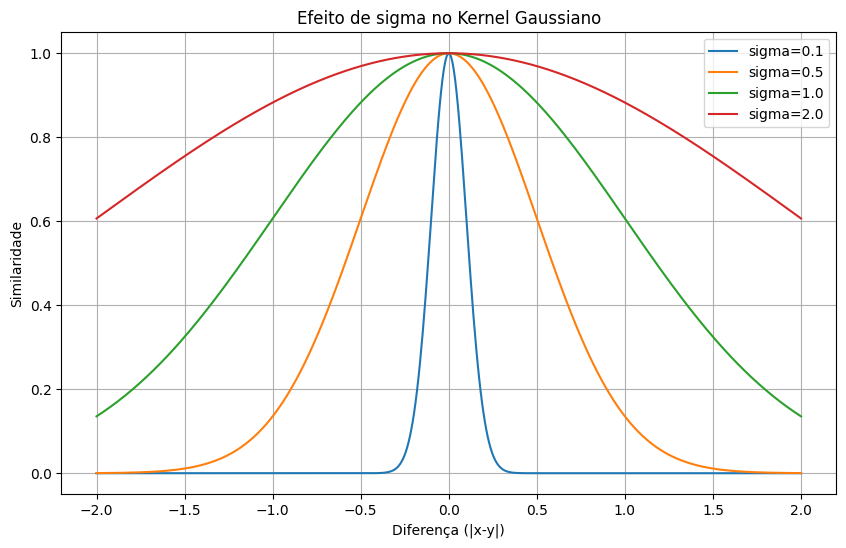

In [37]:
# Exemplo de valores
x = np.linspace(-2, 2, 500)
sigma_values = [0.1, 0.5, 1.0, 2.0]

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    rbf = np.exp(-x**2 / (2 * sigma**2))
    plt.plot(x, rbf, label=f"sigma={sigma}")

plt.title("Efeito de sigma no Kernel Gaussiano")
plt.xlabel("Diferença (|x-y|)")
plt.ylabel("Similaridade")
plt.legend()
plt.grid()
plt.show()

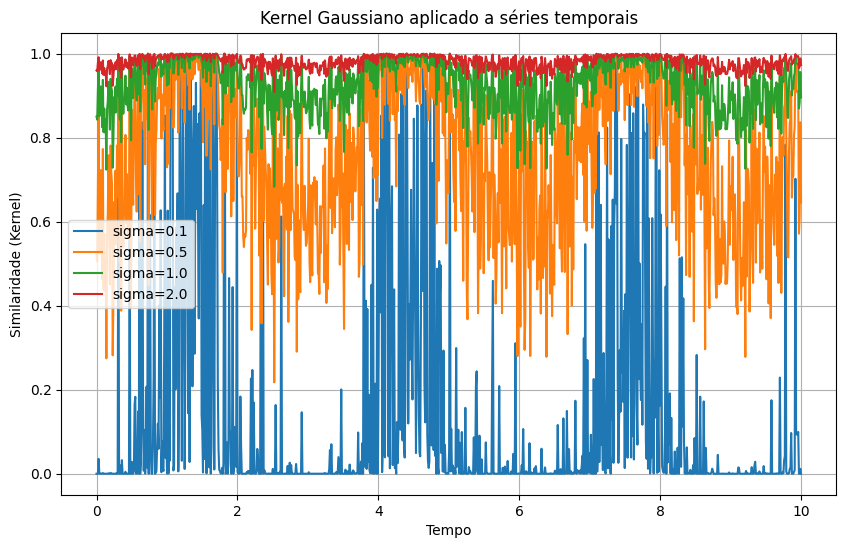

In [45]:
# Diferença entre as séries temporais
differences = np.abs(signal1 - signal2)  # |x - y|

# Valores de sigma a serem testados
sigma_values = [0.1, 0.5, 1.0, 2.0]

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    # Calcula o kernel para cada diferença com o sigma atual
    kernel_values = np.exp(-differences**2 / (2 * sigma**2))
    # Traça os valores do kernel ao longo do tempo
    plt.plot(time, kernel_values, label=f"sigma={sigma}")

plt.title("Kernel Gaussiano aplicado a séries temporais")
plt.xlabel("Tempo")
plt.ylabel("Similaridade (Kernel)")
plt.legend()
plt.grid()
plt.show()

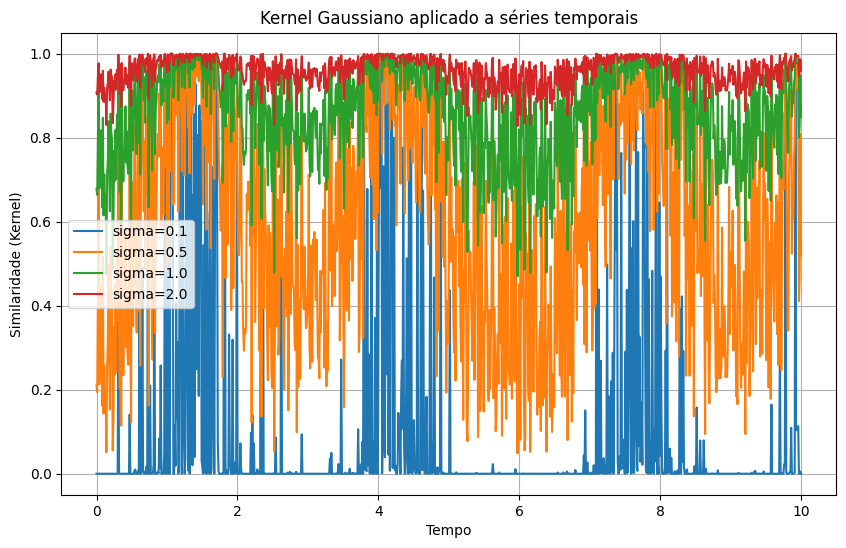

In [46]:
# Diferença entre as séries temporais
differences = np.abs(signal1_normalized - signal2_normalized)  # |x - y|

# Valores de sigma a serem testados
sigma_values = [0.1, 0.5, 1.0, 2.0]

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    # Calcula o kernel para cada diferença com o sigma atual
    kernel_values = np.exp(-differences**2 / (2 * sigma**2))
    # Traça os valores do kernel ao longo do tempo
    plt.plot(time, kernel_values, label=f"sigma={sigma}")

plt.title("Kernel Gaussiano aplicado a séries temporais")
plt.xlabel("Tempo")
plt.ylabel("Similaridade (Kernel)")
plt.legend()
plt.grid()
plt.show()

## Kernel Polinomial

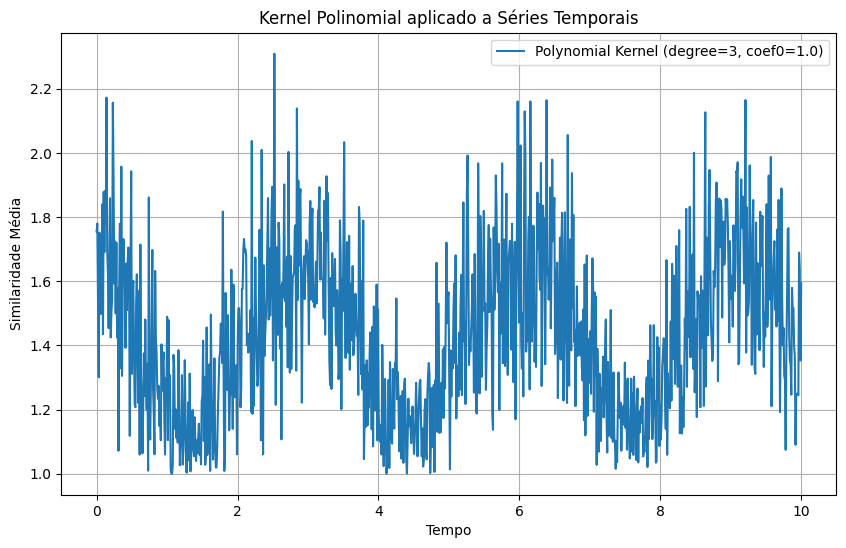

In [47]:
from sklearn.metrics.pairwise import polynomial_kernel

# Séries temporais de exemplo
np.random.seed(42)
time = np.linspace(0, 10, 1000)
signal1 = np.sin(time) + 0.1 * np.random.normal(size=time.shape)
signal2 = np.sin(time + 0.5) + 0.1 * np.random.normal(size=time.shape)

# Diferenças ponto a ponto
differences = np.abs(signal1 - signal2).reshape(-1, 1)

# Parâmetros do kernel polinomial
degree = 3
coef0 = 1.0

# Calculando o kernel
kernel_values = polynomial_kernel(differences, differences, degree=degree, coef0=coef0)

# Média dos valores do kernel ao longo do tempo
kernel_mean = np.mean(kernel_values, axis=1)

# Visualização
plt.figure(figsize=(10, 6))
plt.plot(time, kernel_mean, label=f"Polynomial Kernel (degree={degree}, coef0={coef0})")
plt.title("Kernel Polinomial aplicado a Séries Temporais")
plt.xlabel("Tempo")
plt.ylabel("Similaridade Média")
plt.legend()
plt.grid()
plt.show()

# Experimento Final

Correntropia usando Kernel Polinomial: 7.7196984567663245
Correntropia usando Kernel RBF: 0.5450971929303021


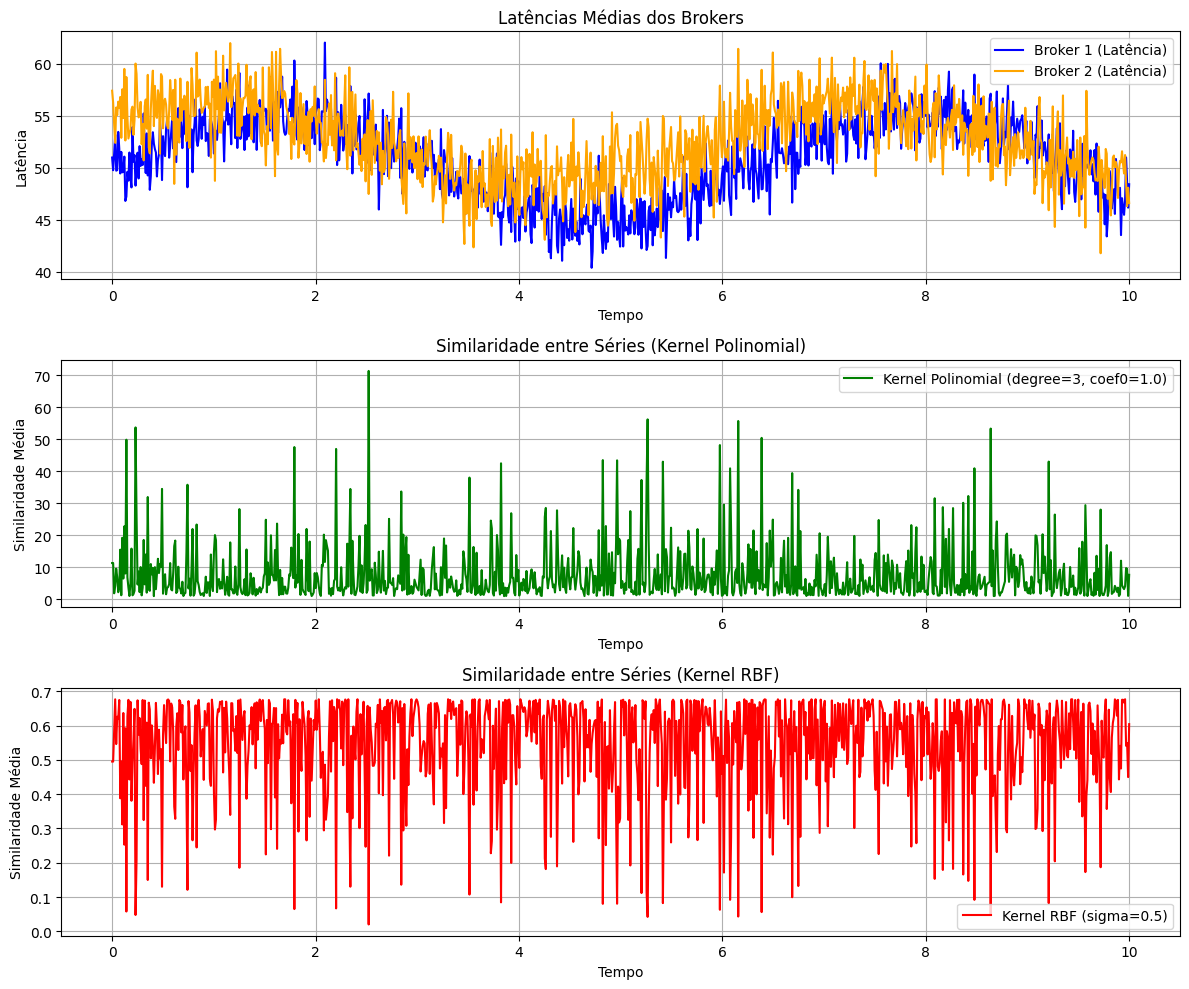

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

# Geração de séries temporais de exemplo
np.random.seed(42)
time = np.linspace(0, 10, 1000)  # Tempo em segundos (ou qualquer unidade)

# Simulando latências médias de dois brokers
latency_broker1 = 50 + 5 * np.sin(time) + 2 * np.random.normal(size=time.shape)
latency_broker2 = 52 + 4 * np.sin(time + 0.5) + 2.5 * np.random.normal(size=time.shape)

# Normalizando as séries para análise de similaridade
latency_broker1_norm = (latency_broker1 - np.mean(latency_broker1)) / np.std(latency_broker1)
latency_broker2_norm = (latency_broker2 - np.mean(latency_broker2)) / np.std(latency_broker2)

# Diferenças ponto a ponto entre as séries
differences = np.abs(latency_broker1_norm - latency_broker2_norm).reshape(-1, 1)

# Parâmetros dos kernels
degree = 3  # Grau para kernel polinomial
coef0 = 1.0  # Offset para kernel polinomial
sigma = 0.5  # Largura do kernel RBF

# Calculando os valores dos kernels
poly_kernel_values = polynomial_kernel(differences, differences, degree=degree, coef0=coef0)
rbf_kernel_values = rbf_kernel(differences, differences, gamma=1.0 / (2 * sigma**2))

# Médias dos valores do kernel ao longo do tempo
poly_mean_similarity = np.mean(poly_kernel_values, axis=1)
rbf_mean_similarity = np.mean(rbf_kernel_values, axis=1)

# Calculando a correntropia (média do valor do kernel)
def calculate_correntropia(kernel_values):
    return np.mean(kernel_values)

# Calculando a correntropia para os dois kernels
poly_correntropia = calculate_correntropia(poly_kernel_values)
rbf_correntropia = calculate_correntropia(rbf_kernel_values)

# Exibindo os valores de correntropia
print(f"Correntropia usando Kernel Polinomial: {poly_correntropia}")
print(f"Correntropia usando Kernel RBF: {rbf_correntropia}")

# Visualização das latências e das similaridades
plt.figure(figsize=(12, 10))

# Plotando as séries temporais
plt.subplot(3, 1, 1)
plt.plot(time, latency_broker1, label="Broker 1 (Latência)", color="blue")
plt.plot(time, latency_broker2, label="Broker 2 (Latência)", color="orange")
plt.title("Latências Médias dos Brokers")
plt.xlabel("Tempo")
plt.ylabel("Latência")
plt.legend()
plt.grid()

# Plotando a similaridade pelo kernel polinomial
plt.subplot(3, 1, 2)
plt.plot(time, poly_mean_similarity, label=f"Kernel Polinomial (degree={degree}, coef0={coef0})", color="green")
plt.title("Similaridade entre Séries (Kernel Polinomial)")
plt.xlabel("Tempo")
plt.ylabel("Similaridade Média")
plt.legend()
plt.grid()

# Plotando a similaridade pelo kernel RBF
plt.subplot(3, 1, 3)
plt.plot(time, rbf_mean_similarity, label=f"Kernel RBF (sigma={sigma})", color="red")
plt.title("Similaridade entre Séries (Kernel RBF)")
plt.xlabel("Tempo")
plt.ylabel("Similaridade Média")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
